In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data adapted from https://github.com/rhubb/SISG2020

- ID: Subject ID

- sex: Sex: 0 = male, 1 = female

- age: Age in years

- chol: Serum total cholesterol, mg/dl

- BMI: Body-mass index, kg/m2

- TG: Serum triglycerides, mg/dl

- APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4

- rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,327,924. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.

- rs4775401: Candidate SNP 2 genotype, chromosome 15, physical position 59,476,915. Coded as the number of minor alleles: 0 = C/C, 1 = C/T, 2 = T/T.

- HTN: diagnosed hypertension: 0 = no, 1 = yes

- chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

In [16]:
#import cholestrol_data_cleaned data
df = pd.read_csv('../data/cholesterol_data.csv')

In [17]:
df.shape

(400, 11)

In [18]:
df.head()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
0,1,1.0,74.0,215.0,26.2,367,4,1,2,1,1
1,2,1.0,51.0,204.0,24.7,150,4,2,1,1,1
2,3,0.0,64.0,205.0,24.2,213,4,0,1,1,0
3,4,0.0,34.0,182.0,23.8,111,2,1,1,1,0
4,5,1.0,52.0,175.0,34.1,328,2,0,0,1,0


In [19]:
#convert column names to lowercase
df.columns = df.columns.str.lower()

In [20]:
df.head()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
0,1,1.0,74.0,215.0,26.2,367,4,1,2,1,1
1,2,1.0,51.0,204.0,24.7,150,4,2,1,1,1
2,3,0.0,64.0,205.0,24.2,213,4,0,1,1,0
3,4,0.0,34.0,182.0,23.8,111,2,1,1,1,0
4,5,1.0,52.0,175.0,34.1,328,2,0,0,1,0


In [21]:
df.describe()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,0.517500,54.857500,183.677500,25.012750,177.440000,3.930000,0.497500,0.565000,0.787500,0.317500
std,115.614301,0.500319,14.241462,21.830137,2.984624,82.983233,0.909488,0.617208,0.621886,0.409589,0.466087
min,1.000000,0.000000,30.000000,117.000000,19.400000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,100.750000,0.000000,43.000000,168.750000,22.975000,114.750000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,200.500000,1.000000,55.000000,183.500000,24.600000,156.500000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,300.250000,1.000000,67.000000,199.000000,26.700000,234.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,400.000000,1.000000,80.000000,247.000000,38.800000,586.000000,6.000000,2.000000,2.000000,1.000000,1.000000


In [22]:
df.dropna(inplace=True)

In [23]:
df.describe()

,id,sex,age,chol,bmi,tg,apoe,rs174548,rs4775401,htn,chd
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,0.517500,54.857500,183.677500,25.012750,177.440000,3.930000,0.497500,0.565000,0.787500,0.317500
std,115.614301,0.500319,14.241462,21.830137,2.984624,82.983233,0.909488,0.617208,0.621886,0.409589,0.466087
min,1.000000,0.000000,30.000000,117.000000,19.400000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,100.750000,0.000000,43.000000,168.750000,22.975000,114.750000,4.000000,0.000000,0.000000,1.000000,0.000000
50%,200.500000,1.000000,55.000000,183.500000,24.600000,156.500000,4.000000,0.000000,0.000000,1.000000,0.000000
75%,300.250000,1.000000,67.000000,199.000000,26.700000,234.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,400.000000,1.000000,80.000000,247.000000,38.800000,586.000000,6.000000,2.000000,2.000000,1.000000,1.000000


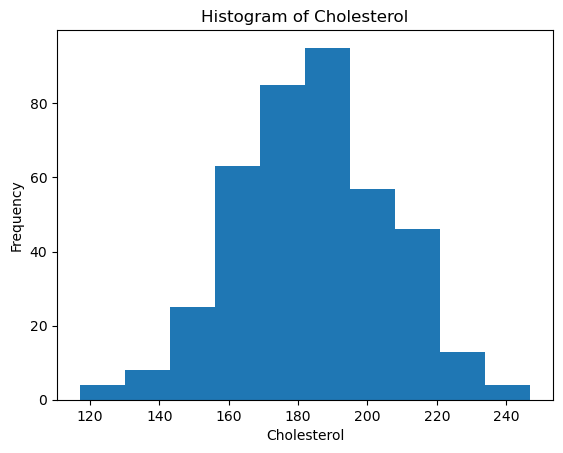

In [24]:
#histogram of chol column using matplotlib
plt.hist(df.chol)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol')
plt.show()


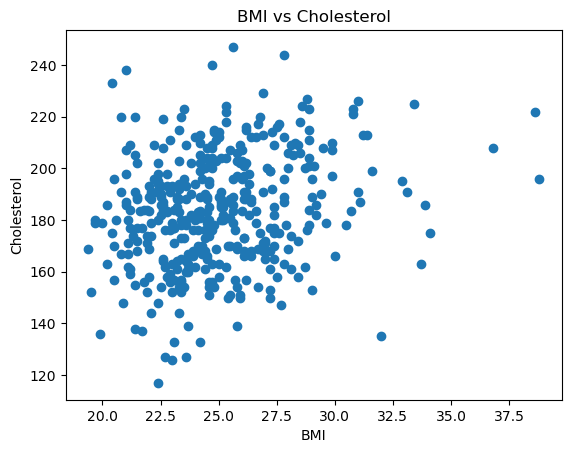

In [25]:
#scatterplot of bmi vs chd using matplotlib
plt.scatter(df.bmi, df.chol)
plt.xlabel('BMI')
plt.ylabel('Cholesterol')
plt.title('BMI vs Cholesterol')
plt.show()


In [26]:
#create indicator variable for bmi > 25
df['bmi_over_25'] = np.where(df.bmi > 25, 1, 0)

In [27]:
#create a frequency table of bmi_over_25

In [29]:
df.columns

Index(['id', 'sex', 'age', 'chol', 'bmi', 'tg', 'apoe', 'rs174548',
       'rs4775401', 'htn', 'chd', 'bmi_over_25'],
      dtype='object')

In [30]:
#mean of 'tg' and count of patients by 'bmi_over_25'
summary_tg_by_bmi_cat = df.groupby('bmi_over_25').agg({'tg': np.mean, 'bmi_over_25': np.size})
#rename columns
summary_tg_by_bmi_cat.columns = ['mean_tg', 'n_patients']
#add column for percent of patients
summary_tg_by_bmi_cat['percent_patients'] = summary_tg_by_bmi_cat.n_patients / summary_tg_by_bmi_cat.n_patients.sum()
summary_tg_by_bmi_cat

,mean_tg,n_patients,percent_patients
bmi_over_25,,,
0,147.150442,226,0.565
1,216.781609,174,0.435


In [31]:
#mean and sd of 'tg' and count of patients by 'bmi_over_25'
summary_tg_by_bmi_cat = df.groupby('bmi_over_25').agg({'tg': {np.mean, np.std}, 'bmi_over_25': np.size})

#rename columns
summary_tg_by_bmi_cat.columns = ['mean_tg', 'sd_tg', 'n_patients']
#add column for percent of patients
summary_tg_by_bmi_cat['percent_patients'] = summary_tg_by_bmi_cat.n_patients / summary_tg_by_bmi_cat.n_patients.sum()
summary_tg_by_bmi_cat

,mean_tg,sd_tg,n_patients,percent_patients
bmi_over_25,,,,
0,61.622683,147.150442,226,0.565
1,90.488070,216.781609,174,0.435


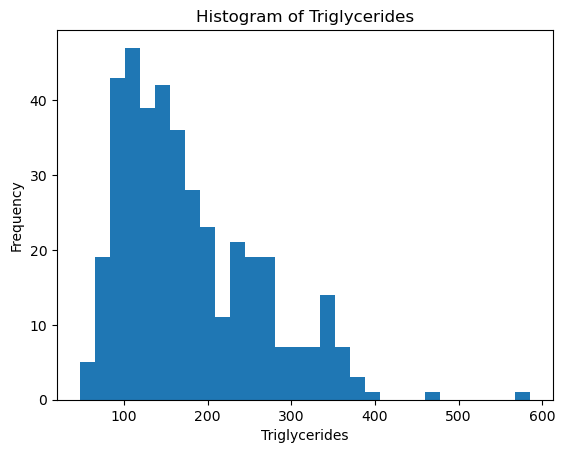

In [32]:
#plot histogram of 'tg' using matplotlib
fig, ax = plt.subplots()
ax.hist(df.tg, bins=30)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Histogram of Triglycerides')
plt.show()

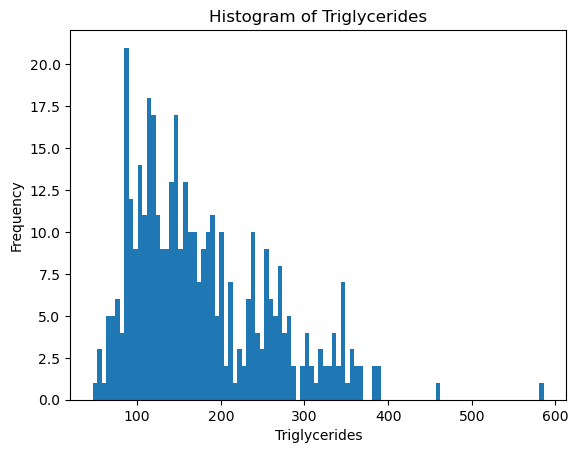

In [33]:
#change bin size of hist
#plot histogram of 'tg' using matplotlib
fig, ax = plt.subplots()
ax.hist(df.tg, bins=100)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Histogram of Triglycerides')
plt.show()

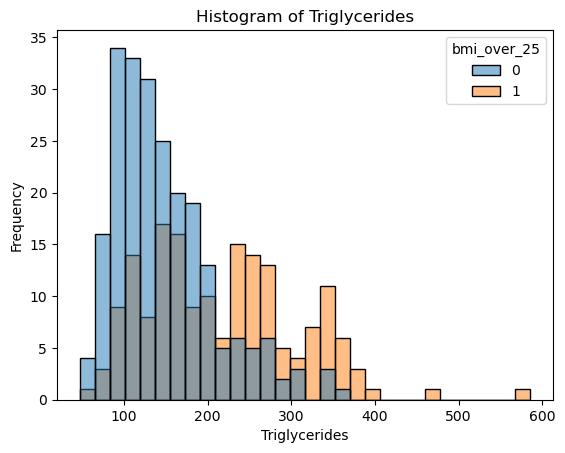

In [34]:
#histogram of 'tg' by 'bmi_over_25' using matplotlib
fig, ax = plt.subplots()
sns.histplot(data=df, x='tg', hue='bmi_over_25', bins=30, ax=ax)
plt.xlabel('Triglycerides')
plt.ylabel('Frequency')
plt.title('Histogram of Triglycerides')
plt.show()


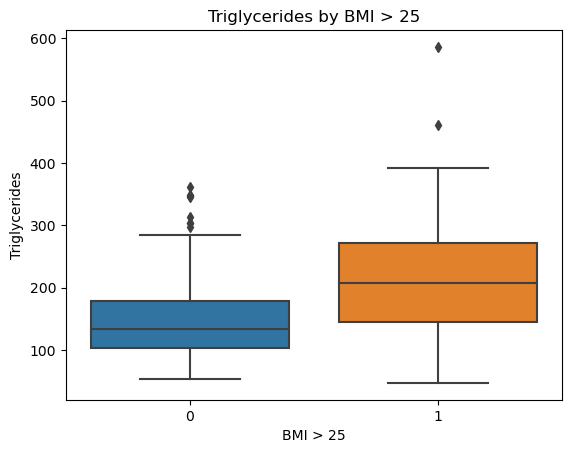

In [35]:
#boxplot of 'tg' by 'bmi_over_25' using seaborn
fig, ax = plt.subplots()
sns.boxplot(data=df, x='bmi_over_25', y='tg', ax=ax)
plt.xlabel('BMI > 25')
plt.ylabel('Triglycerides')
plt.title('Triglycerides by BMI > 25')
plt.show()



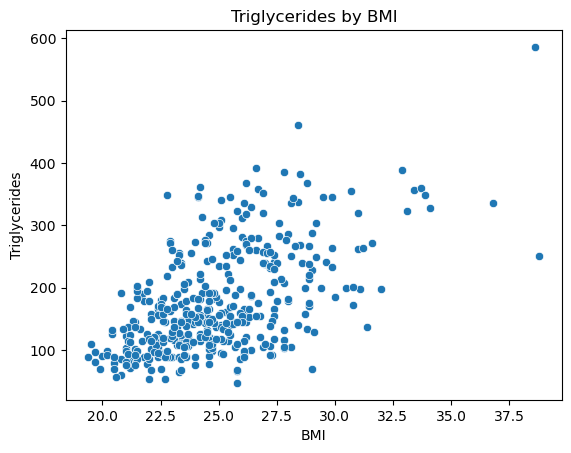

In [36]:
#scatter plot of 'tg' vs 'bmi' using seaborn
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='bmi', y='tg', ax=ax)
plt.xlabel('BMI')
plt.ylabel('Triglycerides')
plt.title('Triglycerides by BMI')
plt.show()


In [37]:
#Use linear regression to investigate the association between triglycerides and BMI
import statsmodels.api as sm
#add constant to model
X = sm.add_constant(df.bmi)
#fit model
model = sm.OLS(df.tg, X).fit()
#view model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     tg   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     182.0
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.04e-34
Time:                        08:48:21   Log-Likelihood:                -2259.2
No. Observations:                 400   AIC:                             4522.
Df Residuals:                     398   BIC:                             4530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -212.1073     29.082     -7.293      0.000    -269.280    -154.934
bmi           15.5739      1.155     13.490      0.000      13.304      17.844
==============================================================================
Omnibus:                       25.982   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.175
Skew:                           0.642   Prob(JB):                     4.62e-07
Kurtosis:                       3.317   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

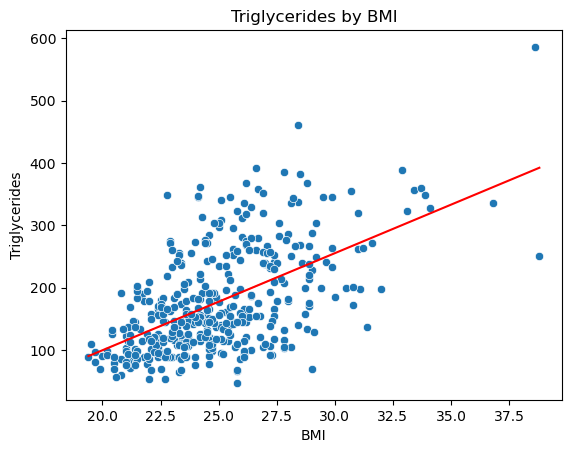

In [38]:
#plot a scatterplot of 'tg' vs 'bmi' using seaborn and overlay the regression line
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='bmi', y='tg', ax=ax)
#add regression line
sns.lineplot(x=df.bmi, y=model.predict(X), color='red', ax=ax)
plt.xlabel('BMI')
plt.ylabel('Triglycerides')
plt.title('Triglycerides by BMI')
plt.show()


In [39]:
#confidence and prediction interval for a new observation with bmi value of 25
#95% prediction interval
model.get_prediction([1, 25]).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,177.241432,3.441498,170.475645,184.007219,41.757883,312.724981


In [40]:
#the rsquared value
model.rsquared

0.3137590012923901

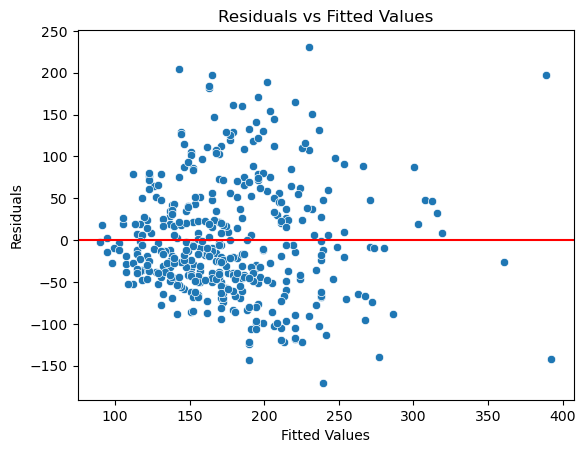

In [41]:
#plot fitted values vs residuals, with a horizontal line at 0
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax)
ax.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


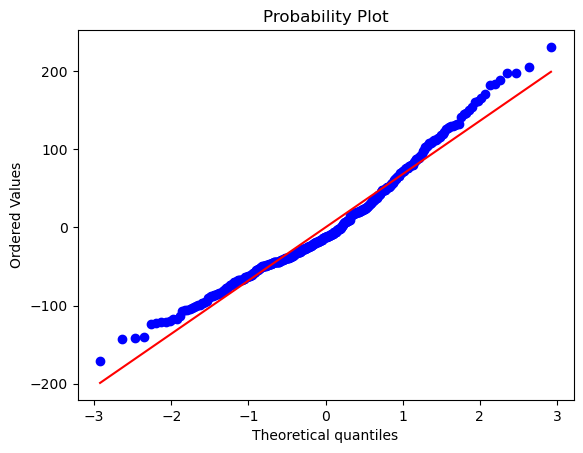

In [42]:
# qqplot of residuals
import scipy.stats as stats
fig, ax = plt.subplots()
stats.probplot(model.resid, plot=ax)
plt.show()


ANOVA

In [43]:
#Conduct an analysis of differences in mean cholesterol levels across genotype groups defined by rs4775401
# avg chol amount by rs4775401
df.groupby('rs4775401').agg({'chol': np.mean})
 


,chol
rs4775401,
0,183.215347
1,184.047059
2,184.767857


In [44]:
#anova for chol by rs4775401
import statsmodels.formula.api as smf
model2 = smf.ols('chol ~ rs4775401', data=df).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2083
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.648
Time:                        08:48:25   Log-Likelihood:                -1800.3
No. Observations:                 400   AIC:                             3605.
Df Residuals:                     398   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.2239      1.477    124.050      0.000     180.320     186.128
rs4775401      0.8028      1.759      0.456      0.648      -2.655       4.261
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.045
Skew:                          -0.021   Prob(JB):                        0.978
Kurtosis:                       2.971   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#anova table
sm.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
rs4775401,1.0,99.458838,99.458838,0.20829,0.64836
Residual,398.0,190045.938662,477.502358,NaN,NaN


In [46]:
#One-way ANOVA (not assuming equal variances)
oneway_ova = stats.f_oneway(df.chol[df.rs4775401 == 0],
               df.chol[df.rs4775401 == 1],
               df.chol[df.rs4775401 == 2])
#print results
print('One-way ANOVA results:')
print('F-statistic:', oneway_ova[0])
print('p-value:', oneway_ova[1])



One-way ANOVA results:
F-statistic: 0.10408346033929108
p-value: 0.9011746663866089
